In [0]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

In [4]:
# Check Python Version
import sys
sys.version
sys.version_info
import platform
print("python version is"+platform.python_version())

'3.6.9 (default, Apr 18 2020, 01:56:04) \n[GCC 8.4.0]'

sys.version_info(major=3, minor=6, micro=9, releaselevel='final', serial=0)

python version is3.6.9


In [0]:
# Check Keras and Tensorflow environment
import os
os.environ["KERAS_BACKEND"] = "tensorflow"
# tensorflow
import tensorflow
print('tensorflow: %s' % tensorflow.__version__)
# keras
import keras
print('keras: %s' % keras.__version__)

tensorflow: 2.2.0-rc2
keras: 2.3.1


Using TensorFlow backend.


In [0]:
# import libaries
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, LSTM, Dropout, advanced_activations
from keras.callbacks import ModelCheckpoint, TensorBoard
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, average_precision_score, recall_score
import seaborn as sns
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn import metrics
from sklearn.metrics import roc_curve, auc,recall_score,precision_score,accuracy_score,f1_score
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


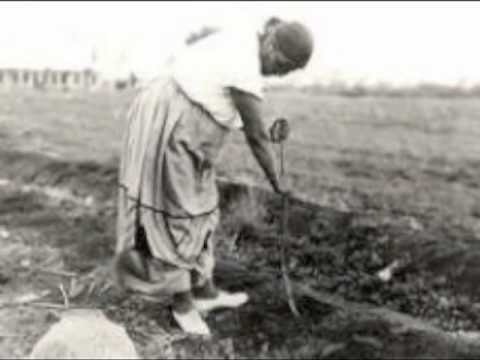

In [0]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
 
# What this case is all about?
from IPython.display import YouTubeVideo
YouTubeVideo("pN4HqWRybwk")

In [0]:
# Import data
df = pd.read_csv('diabetes.csv')
 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
 
# Investigate Data
type(df)
df.size
df.shape
df.head()
df.tail()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [0]:
print ('Overall data summary')
df.describe()
 
print ('Counts of Labels')
df.groupby("Outcome").size()

Overall data summary


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Counts of Labels


Outcome
0    500
1    268
dtype: int64

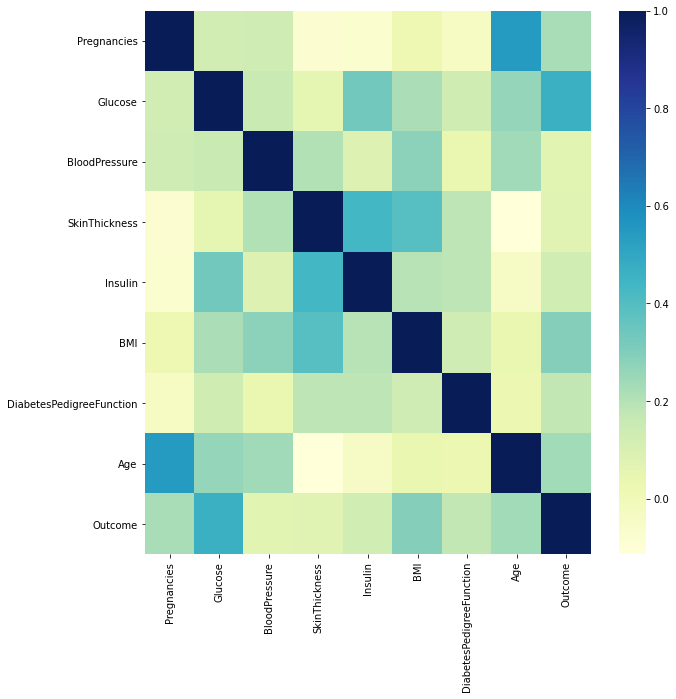

In [0]:

# Variables correlations
x = df.corr()
x
plt.subplots(figsize=(10,10))
sns.heatmap(x,cmap="YlGnBu")
plt.show();


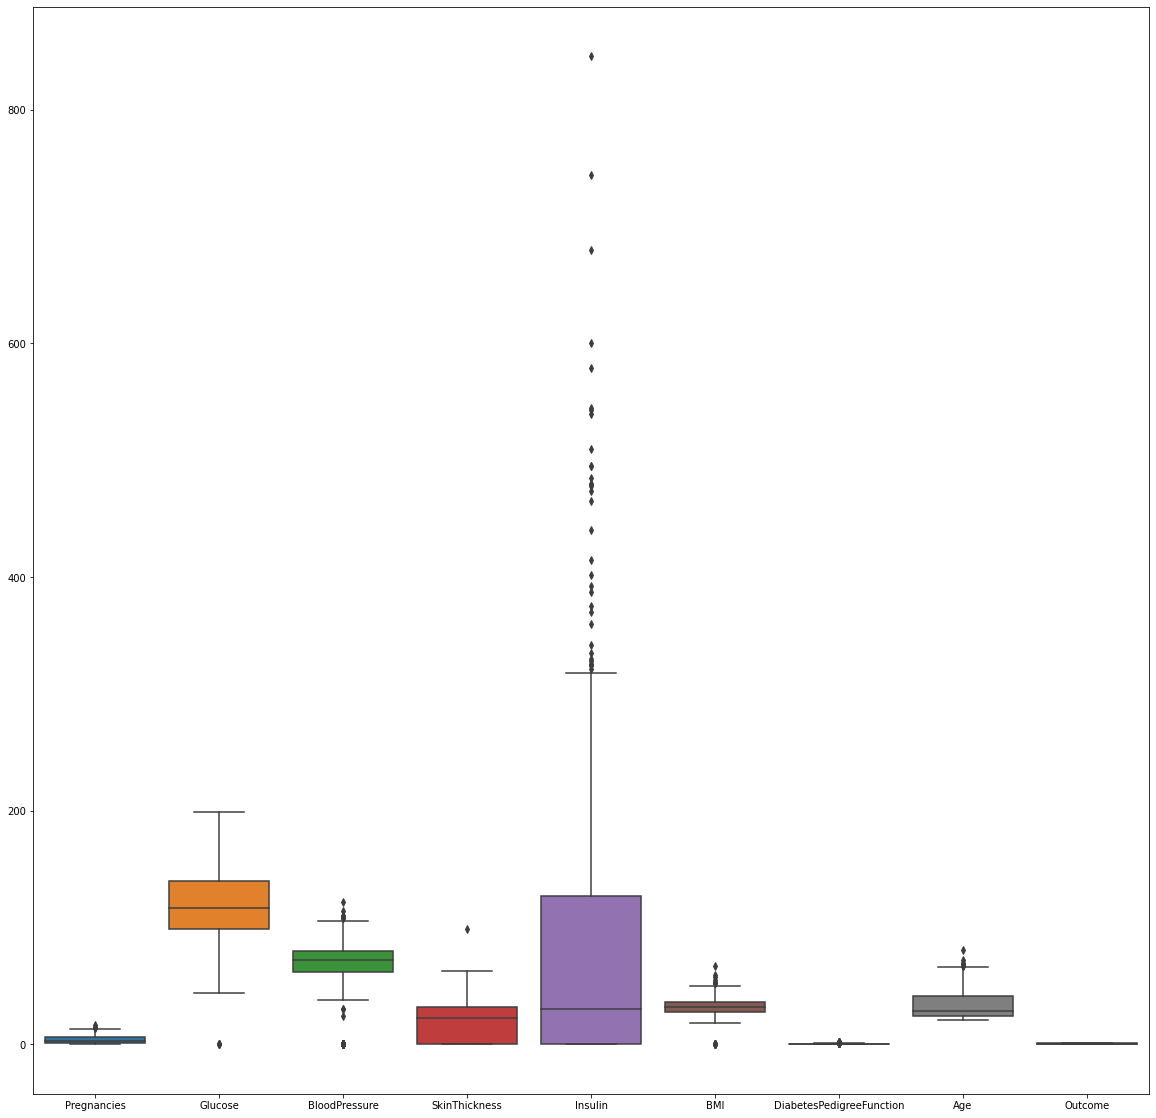

In [0]:
plt.subplots(figsize=(20,20))
sns.boxplot(data=df)
plt.show();

In [0]:
# Create Features and Labels and Standardize data
Y = df.iloc[:,8]
X= df.iloc[:,0:8]
std = StandardScaler()
X_Features= std.fit_transform(X)
# Create train and test data 75% and 25% split
train_x, test_x, train_y, test_y = train_test_split(X_Features, Y, test_size=0.25, random_state=1)
train_x.shape
test_x.shape
train_y.shape
test_y.shape
type(train_x)

(576, 8)

(192, 8)

(576,)

(192,)

numpy.ndarray

In [0]:
# Build Deep Learning Model
model = Sequential()
model.add(Dense(512, input_dim =8))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
 
train_x = np.array(train_x)
train_y = np.array(train_y)
# Fit the model
model.fit(train_x,train_y, epochs=10, batch_size=64)


Epoch 1/10
576/576 [==============================] - 1s 906us/step - loss: 0.6175 - accuracy: 0.6649
Epoch 2/10
576/576 [==============================] - 0s 105us/step - loss: 0.5104 - accuracy: 0.7257
Epoch 3/10
576/576 [==============================] - 0s 109us/step - loss: 0.4854 - accuracy: 0.7604
Epoch 4/10
576/576 [==============================] - 0s 103us/step - loss: 0.4746 - accuracy: 0.7691
Epoch 5/10
576/576 [==============================] - 0s 104us/step - loss: 0.4680 - accuracy: 0.7587
Epoch 6/10
576/576 [==============================] - 0s 112us/step - loss: 0.4522 - accuracy: 0.7743
Epoch 7/10
576/576 [==============================] - 0s 113us/step - loss: 0.4461 - accuracy: 0.7760
Epoch 8/10
576/576 [==============================] - 0s 123us/step - loss: 0.4398 - accuracy: 0.7830
Epoch 9/10
576/576 [==============================] - 0s 98us/step - loss: 0.4327 - accuracy: 0.7778
Epoch 10/10
576/576 [==============================] - 0s 112us/step - loss: 0.4541

In [0]:
# evaluate the model
scores = model.evaluate(test_x, test_y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

192/192 [==============================] - 0s 262us/step

accuracy: 80.73%


In [0]:
classes = model.predict_classes(test_x, batch_size=32, verbose=0)
print (classes.size)
print('Positive Cases in Test Data:', test_y[test_y == 1].shape[0])
print('Neagtive Cases in Test Data:', test_y[test_y == 0].shape[0])
print()
print()
print ('Accuracy Score')
print (metrics.accuracy_score(test_y, classes))
print()
print()
auc = metrics.roc_auc_score(test_y,classes)
print ('AUC')
print (auc)
print()
print()
print ('Precision/Recall Metrics')
print (metrics.classification_report(test_y,classes))

192
Positive Cases in Test Data: 69
Neagtive Cases in Test Data: 123


Accuracy Score
0.8072916666666666


AUC
0.7955107811947686


Precision/Recall Metrics
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       123
           1       0.72      0.75      0.74        69

    accuracy                           0.81       192
   macro avg       0.79      0.80      0.79       192
weighted avg       0.81      0.81      0.81       192



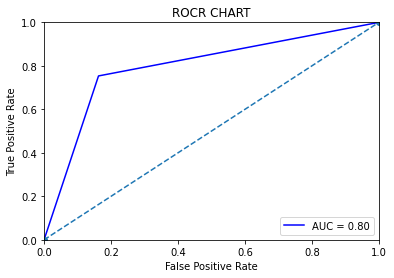

Confusion Matrix


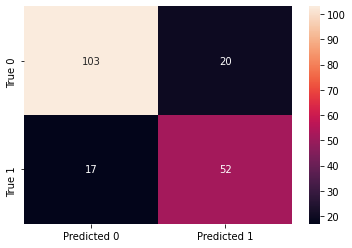

In [0]:
# ROC Chart
fpr, tpr, th= roc_curve(test_y, classes)
roc_auc = metrics.auc(fpr,tpr)
import matplotlib.pyplot as plt
plt.title('ROCR CHART')
plt.plot(fpr,tpr, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'o--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

print ('Confusion Matrix')
cf=  metrics.confusion_matrix(test_y,classes)
lbl1 = ["Predicted 0","Predicted 1"]
lbl2 = ["True 0","True 1"]
sns.heatmap(cf, annot=True, fmt="d", xticklabels=lbl1, yticklabels=lbl2)
plt.show();

In [0]:
!jupyter nbconvert MODUL4_DAY3_LEXICAL.ipynb

[NbConvertApp] Converting notebook MODUL4_DAY3_LEXICAL.ipynb to html
[NbConvertApp] Writing 279929 bytes to MODUL4_DAY3_LEXICAL.html


In [0]:
!jupyter nbconvert TRIMESTER2_MODULE5_DAY4_DEEP_LEARNING.ipynb

[NbConvertApp] Converting notebook TRIMESTER2_MODULE5_DAY4_DEEP_LEARNING.ipynb to html
[NbConvertApp] Writing 400258 bytes to TRIMESTER2_MODULE5_DAY4_DEEP_LEARNING.html
